In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

import pandas as pd
ds = pd.read_csv('./train.csv')
# train.csv is mnist dataset of handwritten digits such that it contains each digit stored as 28x28
# matrix which are compressed to 784(28*28) columns.
# Also the dataset consists of 42000 rows with each row consisting of 785 columns where 0th column 
# represents the label(i.e what number that row actually represents) and rest 784 columns store the 
# 28x28 matrix data of handwritten digits 
print (ds.shape)

data = ds.values
print (data.shape)

(42000, 785)
(42000, 785)


(42000,) (42000, 784)
8


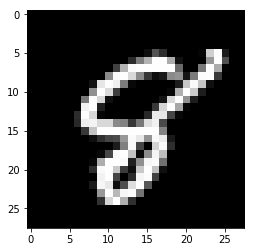

In [11]:
y_train = data[:,0]   # this is the label part which tell which digit in the pics is
x_train = data[:,1:]  # this is the feature vector which stores information about each digit's shape 
print (y_train.shape,x_train.shape) 

plt.figure(0)
idx = 1204  # 1204th index in train.csv file
print (y_train[idx])    # label stored at 1204th location
plt.imshow(x_train[idx].reshape((28,28)),cmap = 'gray') # reshaping the label stored at 1204th location 
# to a 28*28 matrix to get its actual shape
plt.show()

((array([ 6.]), array([7], dtype=int64)), 6.0)
6


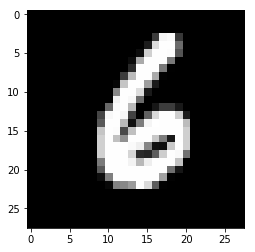

In [14]:
# dist(x1,x2) calculate the euclidean distance b/w two variables
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def KNN(x_train_data,query_point,label_y_train,k=7):
    vals = []
    
    for ix in range(x_train_data.shape[0]):
        v = [dist(query_point,x_train_data[ix, :]),label_y_train[ix]]
        vals.append(v)
        
        
    updated_vals = sorted(vals,key=lambda x : x[0]) # lambda x[0] means sorting on the basis of euclidean 
    # distance
    pred_ar = np.array(updated_vals[:k]) # selecting first k entries from sorted array
    
    # selecting only unique entries along with their counts
    # NOTE: Here [;,1] means using the label column for calculating the count
    pred_ar = np.unique(pred_ar[:,1],return_counts=True)
    
    # storing the index of the entry with maximum count
    pred_idx = pred_ar[1].argmax()
    
    # returning the pred_ar array which represents the label and its count, and returning the label of 
    # index with maximum count i.e. pred_ar[0][pred_idx]
    return pred_ar,pred_ar[0][pred_idx]


iq = int(np.random.random()*x_train.shape[0])  # randomly picks up an index from the training dataset
query_point = x_train[iq] # query point containing 784 columns of information about the digit stored 
# at iq location 

# we are testing the query_point against the first 10000 entries of the training dataset
res = KNN(x_train[:1000],query_point,y_train[:1000])

print (res)

print (y_train[iq])

plt.figure(0)
plt.imshow(query_point.reshape((28,28)),cmap='gray')
plt.show()